# Hello there! 
Den Vylegzhanin here.
Trying to create & train Neural Network to recognize handwritten digits. Using:


*   the famous MNIST dataset http://yann.lecun.com/exdb/mnist/ - as Data for training & testing
*   numpy, matplotlib, tensorflow, keras, sklearn, seaborn - as python libraries
*   logic, math, python
*   jupyter notebook & the google colab as development environment



# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# to omit 'plt.show()' string:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0) # so we have constant result every time they don't change coz of the randomness


We're not gonna use the GPU, for this example we trade everything on CPU. But in case we want to use GPU, google colab has it, maybe next time.

# Getting Data - MNIST

In [ ]:
from keras.datasets import mnist
(image_train, label_train), (image_test, label_test) = mnist.load_data()

In [ ]:
print(f'Now we imported the famous MNIST dataset which contains:\n{image_train.shape[0]} images of {image_train.shape[1]}*{image_train.shape[2]} size with corresponding {label_train.shape[0]} labels - for training;\
\n{image_test.shape[0]} images of {image_test.shape[1]}*{image_test.shape[2]} size with corresponding {label_test.shape[0]} labels - for testing.\n')

number_of_digits = 10
train, test = 0, 0
for i in range(number_of_digits):
  print(f'"{i}" images: {len(image_train[label_train == i])} train + {len(image_test[label_test == i])} test')
  train += len(image_train[label_train == i])
  test += len(image_test[label_test == i])
print(f'Total images: {train} train + {test} test')

Now we imported the famous MNIST dataset which contains:
60000 images of 28*28 size with corresponding 60000 labels - for training;
10000 images of 28*28 size with corresponding 10000 labels - for testing.

"0" images: 5923 train + 980 test
"1" images: 6742 train + 1135 test
"2" images: 5958 train + 1032 test
"3" images: 6131 train + 1010 test
"4" images: 5842 train + 982 test
"5" images: 5421 train + 892 test
"6" images: 5918 train + 958 test
"7" images: 6265 train + 1028 test
"8" images: 5851 train + 974 test
"9" images: 5949 train + 1009 test
Total images: 60000 train + 10000 test


# Visualizing the examples: getting 1 random image of each digit from 0 to 9

len(label_train): 60000
i: 0; label_train[i]: 5
i: 1; label_train[i]: 0
i: 2; label_train[i]: 4
i: 3; label_train[i]: 1
i: 4; label_train[i]: 9
i: 5; label_train[i]: 2
i: 6; label_train[i]: 1
i: 7; label_train[i]: 3
i: 8; label_train[i]: 1
i: 9; label_train[i]: 4


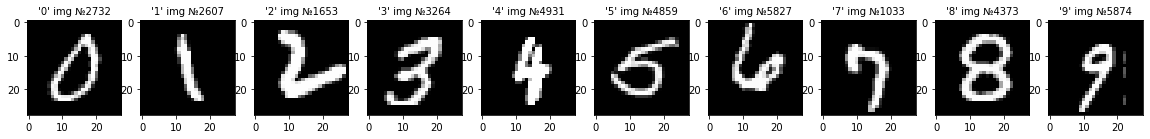

In [ ]:
f, ax = plt.subplots(1, number_of_digits, figsize=(20, 20))
print(f'len(label_train): {len(label_train)}')

for i in range(0, number_of_digits):
  subset_of_i_image = image_train[label_train == i] 
  random_i_image_index = np.random.choice(len(subset_of_i_image))
  sample = subset_of_i_image[random_i_image_index] # 1 image from train dataset
  print(f'i: {i}; label_train[i]: {label_train[i]}')
  ax[i].imshow(sample, cmap='gray') # Using gray pictures, not RGB
  ax[i].set_title(f"'{i}' img №{random_i_image_index}", fontsize=10)

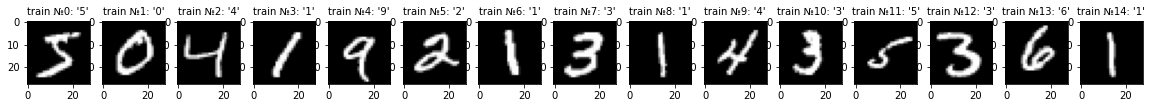

In [ ]:
numbers_to_show = 15
f, ax = plt.subplots(1, numbers_to_show, figsize=(20, 20))

for i in range(numbers_to_show):
  sample = image_train[i]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"train №{i}: '{label_train[i]}'", fontsize=10)

# We want to perform classification - to make each one of the values as a class through 'one-hot decoding' (group of bits, among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)). We show then what it looks like for our 15 first numbers from dataset:

In [ ]:

from tensorflow.keras.utils import to_categorical
label_train = to_categorical(label_train, number_of_digits)
label_test = to_categorical(label_test, number_of_digits)

for i in range(numbers_to_show):
  print(label_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Normalizing data: we have to keep it in certain range - in [0, 1] interval in this example, otherwise Network has a much harder time doing the training & learning the correct weights

In [ ]:
image_train = image_train / 255.0
image_test = image_test / 255.0

# Reshaping Data: as input we don't want to pass matrix (28x28) - but vector (1, 28*28) instead.

In [ ]:
print(image_train.shape[0])
print(image_test.shape[0])
print(image_test.shape)

60000
10000
(10000, 28, 28)


In [ ]:
image_train = image_train.reshape(image_train.shape[0], -1)
image_test = image_test.reshape(image_test.shape[0], -1)
print(image_train.shape)
print(image_test.shape)

(60000, 784)
(10000, 784)


# Creating model - the fully connected neural Network (NW)
'relu' = a function we add after layer to be able to solve nonlinear equations

25% of neurons are gonna be deactivated during the training — helps prevent overfeeding the network

we output 10 (= how many digits) different neurons, which is going to be our classifier, assigns probability for each class to be correct

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu' ))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


We gonna import 512 images into NW at a single time

and fit = start training!

In [ ]:
batch_size = 512
epochs = 10
model.fit(x=image_train, y=label_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 12ms/step - loss: 0.5981 - accuracy: 0.8288
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2248 - accuracy: 0.9349
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1622 - accuracy: 0.9528
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1281 - accuracy: 0.9622
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1054 - accuracy: 0.9691
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0895 - accuracy: 0.9738
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0767 - accuracy: 0.9770
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0654 - accuracy: 0.9803
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0581 - accuracy: 0.9824
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0515 - accura

# Evaluating the test data (which NW hasn't seen before for now)

In [ ]:
test_loss, test_accuracy = model.evaluate(image_test, label_test)
print(f'Test Loss: {test_loss:2%}, Test Accuracy: {test_accuracy:2%}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9778
Test Loss: 7.152803%, Test Accuracy: 97.780001%


More sense to us makes Test Accuracy. >~95% is really good, we can get a bit better actually coz this is a very simple dataset. But this shows — basically we haven't overfitted data
(Overfitting = the model tries to learn too many details in the training data along with the noise from the training data. As a result, the model performance is very poor on unseen or test datasets. Therefore, the network fails to generalize the features or patterns present in the training dataset)

# We use this model to predict a classification on some input image

an array with all the predictions from our test data;
we go to every row, pick the highest P & return that index = number of classification

In [ ]:
predicted_label = model.predict(image_test)
predicted_label_classes = np.argmax(predicted_label, axis=1)
print(predicted_label)
print(predicted_label_classes)

[[1.9664037e-06 1.3527365e-06 6.0217044e-05 ... 9.9869138e-01
  1.0026435e-05 1.0900550e-04]
 [3.9075134e-09 3.8593228e-04 9.9961323e-01 ... 4.3634742e-08
  9.5716203e-08 7.7996212e-12]
 [7.1949576e-06 9.9818927e-01 2.7966837e-04 ... 8.5261947e-04
  8.8255205e-05 2.1069876e-05]
 ...
 [2.8111202e-10 1.1546446e-08 1.1484765e-09 ... 7.6215056e-06
  2.0012698e-07 2.2938044e-05]
 [5.3067893e-08 2.5880757e-07 6.3949010e-08 ... 3.0926493e-08
  1.6494100e-04 3.7934161e-08]
 [8.2283549e-09 3.6520852e-08 1.5742192e-07 ... 5.2001628e-12
  6.1565231e-10 1.0243136e-10]]
[7 2 1 ... 4 5 6]


# Get the random el from test data, make a prediction, see if that's accurate

In [ ]:
random_index = np.random.choice(len(image_test))
image_sample = image_test[random_index]
label_true = np.argmax(label_test, axis=1) # get all the predictions
label_sample_true = label_true[random_index]
label_sample_pred_class = predicted_label_classes[random_index]

# Draw image, plot label

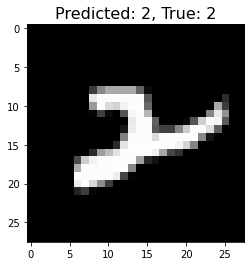

In [ ]:
plt.title(f'Predicted: {label_sample_pred_class}, True: {label_sample_true}', fontsize=16)
plt.imshow(image_sample.reshape(28, 28), cmap='gray')

# We don't really know if NW is predicting one class better than the others. We need to plot a Confusion Matrix - which shows how accurate the NW is for every class.

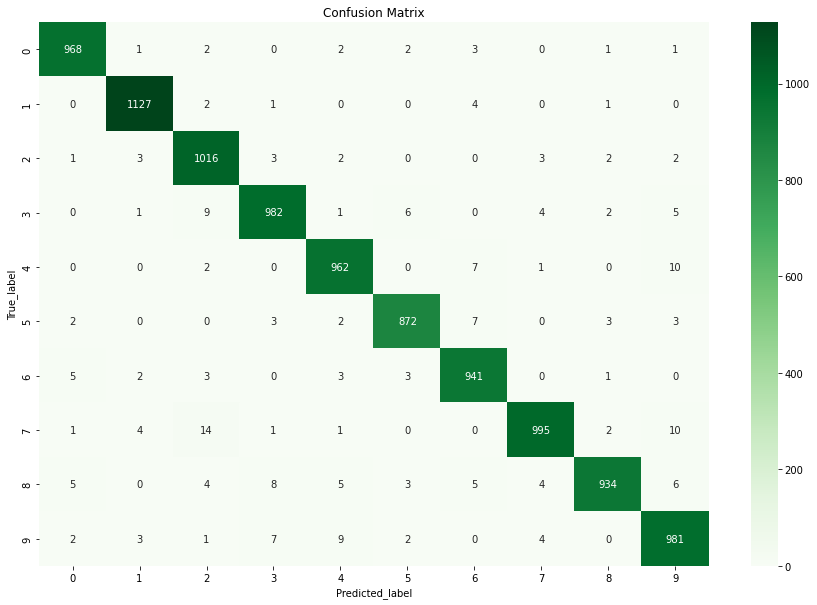

In [ ]:
confusion_M = confusion_matrix(label_true, predicted_label_classes)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_M, annot=True, fmt='d', ax=ax, cmap='Greens')
ax.set_xlabel('Predicted_label')
ax.set_ylabel('True_label')
ax.set_title('Confusion Matrix');

Every column in every row is a class for a digit. 
So in case if we get in 1st line [980, 1, 1, 1, 0, 3, 2, 1, 1, 0] then we interpret that like 'For 980 zero images in dataset we predicted 970 zeros correctly and 10 zeros images in wrong way - as 1*"1", 1*"2", 1*"3", 3*"5", 2*"6", 1*"7", 1*"8".'
Leaders may be like: 

14 of "4"-images recognized as "9";
13 of "7"-images recognized as "3";
8 of:  "7" <-> "9", "8" as "5", "5" as "3"

# Error investigation - investigating samples that don't get correctly classified: visualize some of those, see how they exactly look; theorize why the NW doesn't actually predict those classes correctly etc
We pick some amount of values which the NW has the least confidence about: 

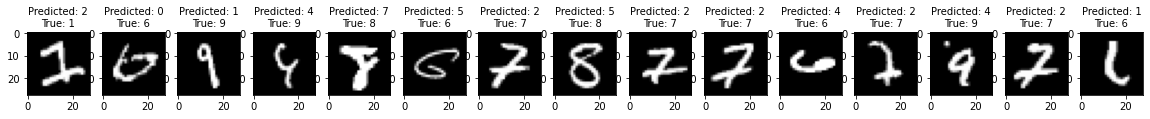

In [ ]:
amount_of_contemplated_errors = 15

errors = (predicted_label_classes - label_true != 0)
predicted_label_classes_errors = predicted_label_classes[errors]
predicted_label_errors = predicted_label[errors]
label_true_errors = label_true[errors]
image_test_errors = image_test[errors]

predicted_label_errors_probability = np.max(predicted_label_errors, axis=1)
true_probabilitlabel_errors = np.diagonal(np.take(predicted_label_errors, label_true_errors, axis=1))
diff_errors_pred_true = predicted_label_errors_probability - true_probabilitlabel_errors

# Get list of indices of sorted differences

sorted_index_diff_errors = np.argsort(diff_errors_pred_true)
top_index_diff_errors = sorted_index_diff_errors[-amount_of_contemplated_errors:]

num = len(top_index_diff_errors)
f, ax = plt.subplots(1, num, figsize=(20, 20))

for i in range(0, num):
  index = top_index_diff_errors[i]
  sample = image_test_errors[index].reshape(28, 28)
  label_t = label_true_errors[index]
  label_p = predicted_label_classes_errors[index]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f'Predicted: {label_p}\nTrue: {label_t}', fontsize=10)